In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

start_clock = time.time()

## Critical Temperature vs Mean-Normalized Standard Deviation

Here we plot $k_BT_c$ vs $\sigma_0/\lambda_0$ for the gaussian, uniform, and symmetric bernoulli distribution.


- For the Gaussian distribution: 

$$
\beta_c = \frac{\lambda_0}{\sigma_{0}^2} \left( 1 - \sqrt{1 - \frac{2\sigma_{0}^2}{\lambda_{0}^2} \ln N}\,\right).
$$

- For the uniform distribution, the exact transition temperature is found by solving 

$$
-\beta_c \lambda_0+\ln \left[\frac{\sinh(\beta_c \sigma_{0}\sqrt{3})}{\beta_c \sigma_{0}\sqrt{3}}\right] + \ln N = 0.  $$

- For symmetric-Bernoulli (or bi-Dirac) distribution: 
$$
\beta_c \bar{\lambda} = \ln \left[ \frac{1}{2N(1-q)} \left( 1 - \sqrt{1- 4N^2 q (1-q)}\right) \right].
$$


In [2]:
### Gaussian ###
betac_gauss = lambda avg_l, std_l, N: (avg_l/(std_l)**2)*(1- np.sqrt(1- 2.0*(std_l**2/(avg_l**2))*np.log(N)  ))

### Dirac ###
betac_dirac = lambda avg_l, std_l, N: (1.0/np.sqrt(avg_l**2 + std_l**2))*np.log((1-avg_l/np.sqrt(std_l**2+avg_l**2))**(-1)*(1-np.sqrt(1-N**2*std_l**2/(std_l**2+avg_l**2 )))/N)

In [3]:
## Uniform distribution constraint function ##
func_flat = lambda beta_c, avg_l, std_l, N: beta_c*avg_l- np.log(N*np.sinh(beta_c*std_l*np.sqrt(3))/(beta_c*std_l*np.sqrt(3)))

## Solving the constraint for beta ##
def flat_solver2(mean_l, sig_l, N):
    
    func_reduced = lambda beta_c: func_flat(beta_c, mean_l, sig_l, N)
    
    beta_guess = np.log(N)/mean_l
    
    beta_soln = fsolve(func_reduced, beta_guess)
    
    return(beta_soln[0])

flat_solver2 = np.vectorize(flat_solver2)

---------

### Plot of transition temperatures as funcitons of $\sigma_0/\lambda_0$

<ipython-input-2-420a332988f8>:2: RuntimeWarning: invalid value encountered in sqrt
  betac_gauss = lambda avg_l, std_l, N: (avg_l/(std_l)**2)*(1- np.sqrt(1- 2.0*(std_l**2/(avg_l**2))*np.log(N)  ))
<ipython-input-2-420a332988f8>:5: RuntimeWarning: invalid value encountered in sqrt
  betac_dirac = lambda avg_l, std_l, N: (1.0/np.sqrt(avg_l**2 + std_l**2))*np.log((1-avg_l/np.sqrt(std_l**2+avg_l**2))**(-1)*(1-np.sqrt(1-N**2*std_l**2/(std_l**2+avg_l**2 )))/N)


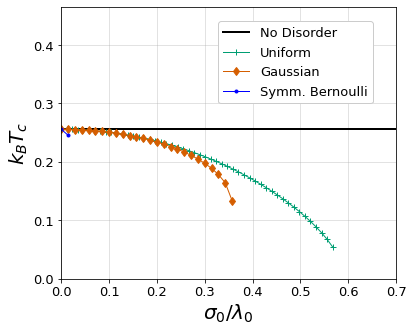

In [4]:
# parameter choices
mean_l = 1.0
Nval = 50
sig_final = .7

# domain of values for standard deviation
sigs = np.linspace(0.000005, sig_final, 50)

# domain of values for standard deviation for the uniform distribution
sigs_flat = np.linspace(0.000005, mean_l/(np.sqrt(3))-0.01, 50)

# create figure
fig = plt.figure(figsize=(6,5))
    
plt.axhline(mean_l/np.log(Nval), color = 'k', linewidth=2, label = 'No Disorder')
plt.plot(sigs_flat, 1.0/(flat_solver2(mean_l, sigs_flat, Nval)), color = (0, 158./255, 115./255), marker = '+', linewidth=1, label = 'Uniform')
plt.plot(sigs, 1.0/(betac_gauss(mean_l, sigs, Nval)), color = (213./255, 94./255, 0) ,marker = 'd', linewidth=1, label = 'Gaussian')
plt.plot(sigs, 1.0/(betac_dirac(mean_l, sigs, Nval)), 'b.-', linewidth=1, label = 'Symm. Bernoulli')

plt.ylim([0,mean_l/np.log(Nval)+.21])
plt.xlim([0, sig_final])
plt.xlabel(r'$\sigma_{0}/\lambda_0$', fontsize=20)
plt.ylabel(r'$k_B T_c$', fontsize=20)
leg = plt.legend(bbox_to_anchor=(.95, .97), fontsize=13)
leg.get_frame().set_alpha(1.0)
plt.grid(alpha = 0.45)

# tick parameters
plt.tick_params(axis='both', which='major', labelsize=13)

# plt.savefig('N50Tc_disorder.png',bbox_inches='tight')

plt.show()

In [5]:
print('Elapsed Time: %.3f sec' % (time.time()-start_clock))

Elapsed Time: 0.386 sec
